<Figure size 960x800 with 0 Axes>

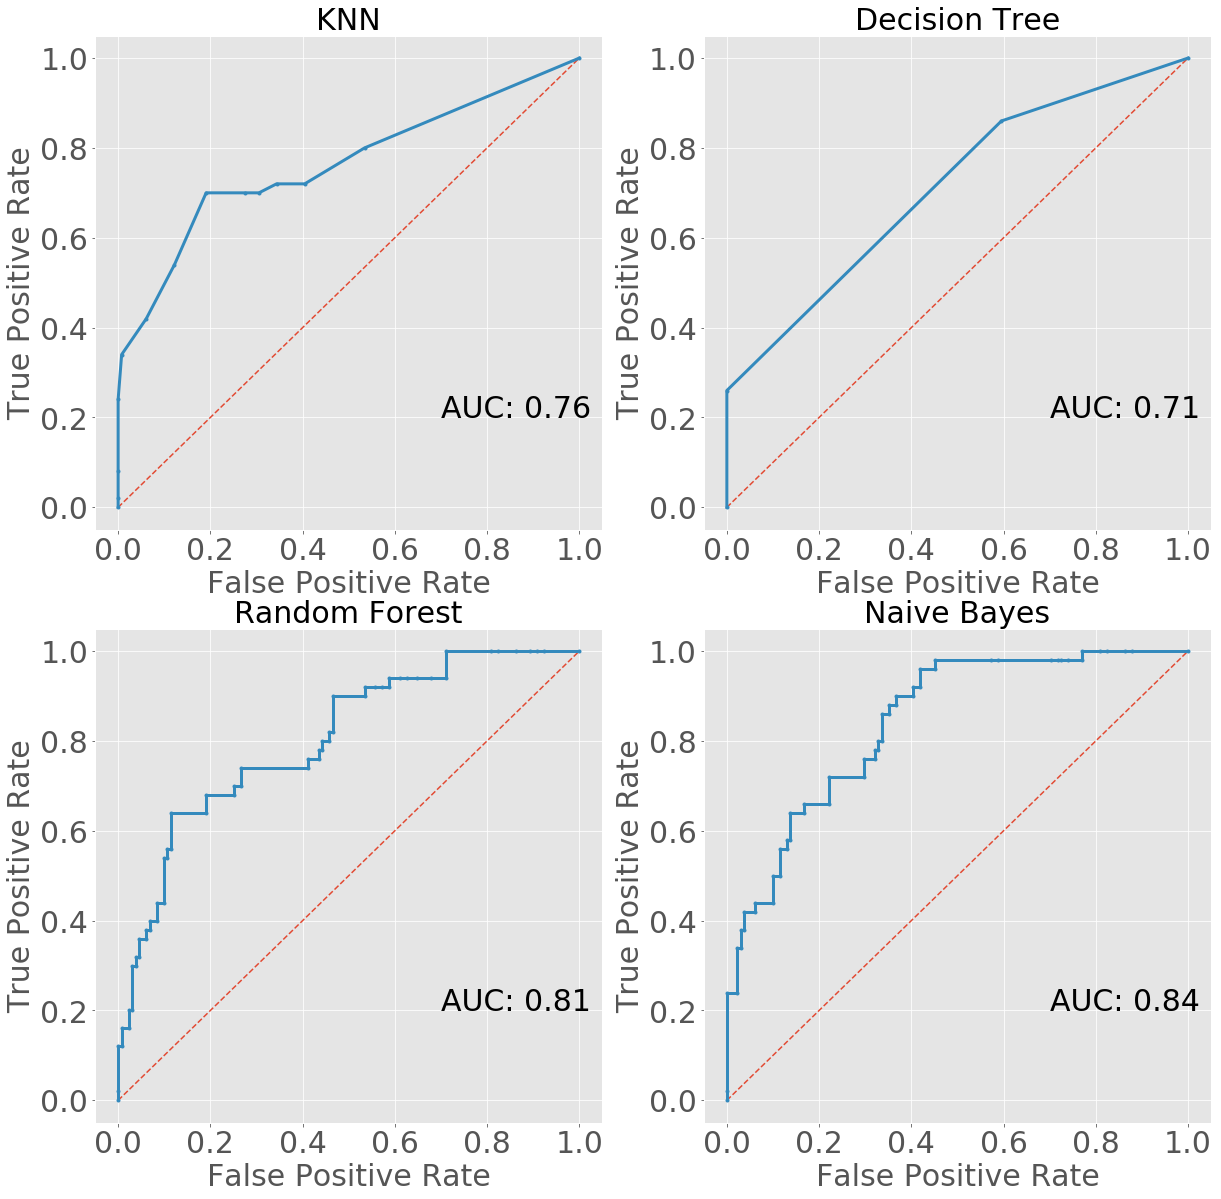

In [18]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import mglearn
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


plt.figure(figsize=(12, 10), dpi=80) 
plt.style.use('ggplot')


## Load Dataset
def loadDataset(path):
    dataframe = pd.read_csv(path)
    return dataframe


## Normalize all attributes
def normalize(df):
    pregnancies_min = df['Pregnancies'].min()
    pregnancies_max = df['Pregnancies'].max()    
    glucose_max = df['Glucose'].max()
    glucose_min = df['Glucose'].min()    
    blood_pressure_max = df['BloodPressure'].max()
    blood_pressure_min = df['BloodPressure'].min()
#     skinthickness_max = df['SkinThickness'].max()
#     skinthickness_min = df['SkinThickness'].min()
#     insulin_max = df['Insulin'].max()
#     insulin_min = df['Insulin'].min()
    bmi_max = df['BMI'].max()
    bmi_min = df['BMI'].min()
#     diabetes_pedigree_function_max = df['DiabetesPedigreeFunction'].max()
#     diabetes_pedigree_function_min = df['DiabetesPedigreeFunction'].min()
    age_max = df['Age'].max()
    age_min = df['Age'].min()
    max_min_dict = {
        'pregnancies_min': pregnancies_min,
        'pregnancies_max': pregnancies_max,    
        'glucose_max': glucose_max,
        'glucose_min': glucose_min,    
        'blood_pressure_max': blood_pressure_max,
        'blood_pressure_min': blood_pressure_min,
        'bmi_max': bmi_max,
        'bmi_min': bmi_min,
        'age_max': age_max,
        'age_min': age_min
    }
    
    for i in range(0,df.index.size):
        df.iloc[i,0] = (df.iloc[i,0] - pregnancies_min) / (pregnancies_max-pregnancies_min)
        df.iloc[i,1] = (df.iloc[i,1] - glucose_min) / (glucose_max-glucose_min)
        df.iloc[i,2] = (df.iloc[i,2] - blood_pressure_min) / (blood_pressure_max-blood_pressure_min)
#         df.iloc[i,3] = (df.iloc[i,3] - skinthickness_min) / (skinthickness_max-skinthickness_min)
#         df.iloc[i,4] = (df.iloc[i,4] - insulin_min) / (insulin_max-insulin_min)
        df.iloc[i,3] = (df.iloc[i,3] - bmi_min) / (bmi_max-bmi_min)
#         df.iloc[i,6] = (df.iloc[i,6] - diabetes_pedigree_function_min) / (diabetes_pedigree_function_max-diabetes_pedigree_function_min)
        df.iloc[i,4] = (df.iloc[i,4] - age_min) / (age_max-age_min)
    return df, max_min_dict


## Normalize all attributes
def normalize_test_set(df, max_min_dict):
    pregnancies_min = max_min_dict['pregnancies_min']
    pregnancies_max = max_min_dict['pregnancies_max']
    glucose_max = max_min_dict['glucose_max']
    glucose_min = max_min_dict['glucose_min']    
    blood_pressure_max = max_min_dict['blood_pressure_max']
    blood_pressure_min = max_min_dict['blood_pressure_min']
#     skinthickness_max = df['SkinThickness'].max()
#     skinthickness_min = df['SkinThickness'].min()
#     insulin_max = df['Insulin'].max()
#     insulin_min = df['Insulin'].min()
    bmi_max = max_min_dict['bmi_max']
    bmi_min = max_min_dict['bmi_min']
#     diabetes_pedigree_function_max = df['DiabetesPedigreeFunction'].max()
#     diabetes_pedigree_function_min = df['DiabetesPedigreeFunction'].min()
    age_max = max_min_dict['age_max']
    age_min = max_min_dict['age_min']
    
    for i in range(0,df.index.size):
        df.iloc[i,0] = (df.iloc[i,0] - pregnancies_min) / (pregnancies_max-pregnancies_min)
        df.iloc[i,1] = (df.iloc[i,1] - glucose_min) / (glucose_max-glucose_min)
        df.iloc[i,2] = (df.iloc[i,2] - blood_pressure_min) / (blood_pressure_max-blood_pressure_min)
#         df.iloc[i,3] = (df.iloc[i,3] - skinthickness_min) / (skinthickness_max-skinthickness_min)
#         df.iloc[i,4] = (df.iloc[i,4] - insulin_min) / (insulin_max-insulin_min)
        df.iloc[i,3] = (df.iloc[i,3] - bmi_min) / (bmi_max-bmi_min)
#         df.iloc[i,6] = (df.iloc[i,6] - diabetes_pedigree_function_min) / (diabetes_pedigree_function_max-diabetes_pedigree_function_min)
        df.iloc[i,4] = (df.iloc[i,4] - age_min) / (age_max-age_min)
    return df



def scatter_plot(X_train, y_train):
    colors_palette = {0: 'green', 1: 'red'}
    colors = [colors_palette[c] for c in y_train]
    grr = pd.plotting.scatter_matrix(X_train, c=colors, marker=".", figsize =(20,15), alpha = 0.8, range_padding=0.05, diagonal="kde" , s=60, grid=True)
#     plt.savefig("scatter_kaggle_normalized(5 attr).png")
    #scatter_plot_ends




##Knn Accuracy Graph
def knn_accuracy_graph(max_neighbor, X_train, y_train, X_test, y_test, title, lwidht):
    neighbors_settings = range(1, max_neighbor)
    training_acuracy = []
    test_acuracy = []
    cross_validation_accuracy = []
    for neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=neighbors)
        clf.fit(X_train, y_train)
        cross_validation_accuracy.append(cross_val_score(clf, X_train, y_train, cv=3).mean())
        training_acuracy.append(clf.score(X_train,y_train))
        test_acuracy.append(clf.score(X_test,y_test))
        
    plt.plot(neighbors_settings, cross_validation_accuracy, label='3 Fold Cross-validation Accuracy', linewidth=lwidht)
    plt.plot(neighbors_settings, training_acuracy, label='Training Acuracy', linewidth=lwidht)    
    plt.plot(neighbors_settings, test_acuracy, 'g', label='Test Acuracy', linewidth=lwidht)
    plt.xticks(np.arange(min(neighbors_settings), max(neighbors_settings)+2, 1.0))
#     plt.yticks(np.arange(min([0,1]), max([0,1])+1, 0.05))
    plt.hlines(0.776536312849162, 0, 23, colors='k', linestyles='solid')
    plt.scatter(16, 0.776536312849162, s=150, c='green')
#     plt.annotate("16,0.776536312849162", (16,0.79))
    plt.xlabel("Neighbors", size=25)
    plt.ylabel("Accuray", size=25)
    plt.yticks(size=20)
    plt.xticks(size=20)
#     plt.title(title, size=25)
    plt.legend(prop={'size': 20})
#     plt.show()
    plt.savefig(title+'.png')
    #knn_accuracy_graph ends


def knn_model(X_train, y_train, max_min_dict, neighbor):
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    print("Predicting Based on K-NN:")
    print("----------------------------------")
    pregnancy = input("Number of Pregnency: ")
    glucose = input("Glucose level: ")
    blood_pressure = input("Blood Pressure: ")
    bmi = input("BMI: ")
    age = input("Age: ")
    #pregnancy = (float(pregnancy) - max_min_dict['pregnancies_min']) / (max_min_dict['pregnancies_max'] - max_min_dict['pregnancies_min'])
    glucose = (float(glucose) - max_min_dict['glucose_min']) / (max_min_dict['glucose_max'] - max_min_dict['glucose_min'])
    blood_pressure = (float(blood_pressure) - max_min_dict['blood_pressure_min']) / (max_min_dict['blood_pressure_max'] - max_min_dict['blood_pressure_min'])
    bmi = (float(bmi) - max_min_dict['bmi_min']) / (max_min_dict['bmi_max'] - max_min_dict['bmi_min'])
    #age = (float(age) - max_min_dict['age_min']) / (max_min_dict['age_max'] - max_min_dict['age_min'])
    df_dic = {
        #'Pregnancies': [pregnancy],
        'Glucose': [glucose],    
        'BloodPressure': [blood_pressure],
        'BMI': [bmi]    
        #'Age': [age]
    }
    df = pd.DataFrame(data=df_dic)
    result = knn.predict(df)
    if(result == 0):
        print("Congratulations! You don't have diabetes.")
    elif(result == 1):
        print("Opps! Seems like you have diabetes. Take care of yourself.")
    ##Ends knn_model

    
    
def print_decision_tree(tree_clf, features):
    dot_data = StringIO()
    export_graphviz(tree_clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = features,class_names=["Doesn't have diabetes","Has diabetes"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('tree.png')
    Image(graph.create_png())
    

def decision_tree_accuracy_graph(tree, X_train, y_train, X_test, y_test, max_depth, title, lwidth):
    test_accuracy = []
    train_accuracy = []
    cross_validation_accuracy = []
    depth_range = range(1,max_depth)
    for i in depth_range:
        tree.max_depth = i
        tree.fit(X_train, y_train)
        cross_validation_accuracy.append(cross_val_score(tree,X_train, y_train, cv=3).mean()) 
        train_accuracy.append(tree.score(X_train, y_train))
        test_accuracy.append(tree.score(X_test, y_test))
    plt.plot(depth_range, cross_validation_accuracy, label="3 Fold Cross-validation Accuracy", linewidth=lwidth)    
    plt.plot(depth_range, train_accuracy, label="Train Accuracy", linewidth=lwidth)    
    plt.plot(depth_range, test_accuracy, 'g', label="Test Accuracy", linewidth=lwidth)
    plt.hlines(0.7225325884543762, 0, 40, colors='k', linestyles='solid')
    plt.scatter(2, 0.7225325884543762, s=150, c='green')
    plt.xlabel("Tree Depth", size=25)
    plt.ylabel("Accuracy", size=25)
    plt.yticks(size=20)
    plt.xticks(size=20)
#     plt.title(title, size=25)
    plt.legend(prop={'size': 20})
    plt.savefig(title+".png")
    
    
def decision_tree_model(X_train, y_train, max_min_dict, depth):
    tree_clf = DecisionTreeClassifier(criterion="entropy")
    tree_clf.max_depth=depth
    tree_clf.fit(X_train, y_train)
    print("Predicting Based on Decision Tree:")
    print("----------------------------------")
    pregnancy = input("Number of Pregnency: ")
    glucose = input("Glucose level: ")
    blood_pressure = input("Blood Pressure: ")
    bmi = input("BMI: ")
    age = input("Age: ")
    pregnancy = (float(pregnancy) - max_min_dict['pregnancies_min']) / (max_min_dict['pregnancies_max'] - max_min_dict['pregnancies_min'])
    glucose = (float(glucose) - max_min_dict['glucose_min']) / (max_min_dict['glucose_max'] - max_min_dict['glucose_min'])
    blood_pressure = (float(blood_pressure) - max_min_dict['blood_pressure_min']) / (max_min_dict['blood_pressure_max'] - max_min_dict['blood_pressure_min'])
    bmi = (float(bmi) - max_min_dict['bmi_min']) / (max_min_dict['bmi_max'] - max_min_dict['bmi_min'])
    age = (float(age) - max_min_dict['age_min']) / (max_min_dict['age_max'] - max_min_dict['age_min'])
    df_dic = {
        'Pregnancies': [pregnancy],
        'Glucose': [glucose],    
        'BloodPressure': [blood_pressure],
        'BMI': [bmi],    
        'Age': [age]
    }
    df = pd.DataFrame(data=df_dic)
    result = tree_clf.predict(df)
    if(result == 0):
        print("Congratulations! You don't have diabetes.")
    elif(result == 1):
        print("Opps! Seems like you have diabetes. Take care of yourself.")
        
        
    
def HyperParameterTune(clf, param_grid, x_train, y_train):
    grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')
    grid.fit(x_train,y_train)
    print(grid.best_score_)
    print(grid.best_params_)
    print(grid.best_estimator_)
    
def correlationMatrix(df):
    fig, ax = plt.subplots(figsize=(40,40))
    g = sns.heatmap(df.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',  linewidths=1, linecolor='black', ax=ax, annot_kws={"size": 65}, cbar=False)
#     plt.title("Correlation Matrix between attributes", fontsize =50)
    g.set_yticklabels(g.get_yticklabels(), rotation = 45, fontsize = 50)
    g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 50)
    plt.savefig("co_relation.png")
    

def whiskerPlot():
    diabetes_glucose = df[df["Outcome"]==1]["Glucose"]
    nondiabetes_glucose = df[df["Outcome"]==0]["Glucose"]
    diabetes_pregnancy = df[df["Outcome"]==1]["Pregnancies"]
    nondiabetes_pregnancy = df[df["Outcome"]==0]["Pregnancies"]
    diabetes_bmi = df[df["Outcome"]==1]["BMI"]
    nondiabetes_bmi = df[df["Outcome"]==0]["BMI"]
    diabetes_age = df[df["Outcome"]==1]["Age"]
    nondiabetes_age = df[df["Outcome"]==0]["Age"]
    diabetes_bp = df[df["Outcome"]==1]["BloodPressure"]
    nondiabetes_bp = df[df["Outcome"]==0]["BloodPressure"]

    f = plt.figure(figsize=(15,15))
    f.add_subplot(221)
    plt.boxplot([nondiabetes_glucose,diabetes_glucose], labels = ["Negative", "Positive"], showmeans=True, widths=0.3)
    plt.ylabel("Blood sugar level", size=22)
    plt.yticks(size=18)
    plt.xticks(size=22)

    f.add_subplot(222)
    plt.boxplot([nondiabetes_pregnancy,diabetes_pregnancy], labels = ["Negative", "Positive"], showmeans=True, widths=0.3)
    plt.ylabel("Number of pregnancies", size=22)
    plt.yticks(size=18)
    plt.xticks(size=22)

    f.add_subplot(223)
    plt.boxplot([nondiabetes_bmi,diabetes_bmi], labels = ["Negative", "Positive"], showmeans=True, widths=0.3)
    plt.ylabel("BMI", size=22)
    plt.yticks(size=18)
    plt.xticks(size=22)

    f.add_subplot(224)
    plt.boxplot([nondiabetes_age,diabetes_age], labels = ["Negative", "Positive"], showmeans=True, widths=0.3)
    plt.ylabel("Age", size=22)
    plt.yticks(size=18)
    plt.xticks(size=22)

#     f.add_subplot(235)
#     plt.boxplot([nondiabetes_bp,diabetes_bp], labels = ["Negative", "Positive"], showmeans=True, widths=0.3)
#     plt.ylabel("Blood Pressure", size=14)
#     plt.xticks(size=14)
#     f.suptitle('Box-plot of Pima Dataset', fontsize=18)
    plt.savefig("Box-plot.png")

def plotConfusionMatrix(mat,title):
    mat = pd.DataFrame(mat)
    fig, ax = plt.subplots(figsize=(20,15))
    g = sns.heatmap(mat, annot=True, fmt='g' , ax=ax, cmap= 'coolwarm',  linewidths=3, linecolor='black', 
                    annot_kws={"size": 45}, cbar=False)
    g.set_yticklabels(['Yes', 'No'], rotation = 0, fontsize = 30)
    g.set_xticklabels(['Yes', 'No'], rotation = 0, fontsize = 30)
    plt.title(title, size=30)
    plt.savefig("asd.png")
    
    
def randomForestGridSearch(x_train, y_train):
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]# Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
    rf_random.fit(x_train, y_train)
    return (rf_random.best_estimator_)
    
    

        
        
def plotAccuracyBar(classifiers, accuracies, label1):    
    accuracies_kth = [0.8121546961325967, 0.7955801104972375, 0.7790055248618785, 0.7734806629834254]
    y_pos = np.arange(len(classifiers))
    fig, ax = plt.subplots(figsize=(15,10))
    plt.ylim(0, 1)
    width = 0.35 
    rects1 = plt.bar(y_pos - width/2, accuracies, width=width, color='green', edgecolor='black', 
            linewidth=1, label = label1)
    rects2 = plt.bar(y_pos + width/2, accuracies_kth, width=width, color='orange', edgecolor='black', 
            linewidth=1, label = "KTH dataset accuracy")
    plt.ylabel("Accuracy", size=18)
    plt.xlabel("Classifiers", size=18)
    plt.legend(prop={'size': 15})
    plt.title("Accuracy of different classifiers", size=18)
    plt.xticks(ticks=y_pos, labels=classifiers, size=15)
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()      
            ax.annotate('{:.2f}%'.format(height*100),
                        xy=(rect.get_x() + rect.get_width() / 6, height+0.01), 
                       size=15)
    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    plt.savefig("Accuracybar.png")
        
        
        

def generateRocAucCurve():
    #Knn 
    prob_knn = knn.predict_proba(df_KTH_frame)
    roc_auc_s_knn = roc_auc_score(outcome_original, prob_knn[:,1])
    fpr_knn, tpr_knn, thresh_knn = roc_curve(outcome_original, prob_knn[:,1])
    #Decision Tree 
    prob_tree = tree_clf.predict_proba(df_KTH_frame)
    roc_auc_s_tree = roc_auc_score(outcome_original, prob_tree[:,1])
    fpr_tree, tpr_tree, thresh_tree = roc_curve(outcome_original, prob_tree[:,1])
    #Random Forest 
    prob_rf = rf.predict_proba(df_KTH_frame)
    roc_auc_s_rf = roc_auc_score(outcome_original, prob_rf[:,1])
    fpr_rf, tpr_rf, thresh_rf = roc_curve(outcome_original, prob_rf[:,1])
    #Naive Bayes
    prob_gnb = gnb.predict_proba(df_KTH_frame)
    roc_auc_s_gnb = roc_auc_score(outcome_original, prob_gnb[:,1])
    fpr_gnb, tpr_gnb, thresh_gnb = roc_curve(outcome_original, prob_gnb[:,1])

    f = plt.figure(figsize=(20,20))
    f.add_subplot(221)
    plt.plot([0,1], [0,1], linestyle="--")
    plt.plot(fpr_knn, tpr_knn, marker=".", linewidth=3)
    plt.annotate('AUC: {:.2f}'.format(roc_auc_s_knn), (0.7,0.2), size=30)
    plt.xlabel("False Positive Rate", size=30)
    plt.ylabel("True Positive Rate", size = 30)
    plt.xticks(size = 30)
    plt.yticks(size = 30)
    plt.title("KNN", size=30)

    f.add_subplot(222)
    plt.plot([0,1], [0,1], linestyle="--")
    plt.plot(fpr_tree, tpr_tree, marker=".", linewidth=3)
    plt.annotate('AUC: {:.2f}'.format(roc_auc_s_tree), (0.7,0.2), size=30)
    plt.xlabel("False Positive Rate", size=30)
    plt.ylabel("True Positive Rate", size = 30)
    plt.xticks(size = 30)
    plt.yticks(size = 30)
    plt.title("Decision Tree", size=30)

    f.add_subplot(223)
    plt.plot([0,1], [0,1], linestyle="--")
    plt.plot(fpr_rf, tpr_rf, marker=".", linewidth=3)
    plt.annotate('AUC: {:.2f}'.format(roc_auc_s_rf), (0.7,0.2), size=30)
    plt.xlabel("False Positive Rate", size=30)
    plt.ylabel("True Positive Rate", size = 30)
    plt.xticks(size = 30)
    plt.yticks(size = 30)
    plt.title("Random Forest", size=30)

    f.add_subplot(224)
    plt.plot([0,1], [0,1], linestyle="--")
    plt.plot(fpr_gnb, tpr_gnb, marker=".", linewidth=3)
    plt.annotate('AUC: {:.2f}'.format(roc_auc_s_gnb), (0.7,0.2), size=30)
    plt.xlabel("False Positive Rate", size=30)
    plt.ylabel("True Positive Rate", size = 30)
    plt.xticks(size = 30)
    plt.yticks(size = 30)
    plt.title("Naive Bayes", size=30)
    plt.savefig("ROC_AUC_KTH")
        
        
        
        
        
        
        
    


df = loadDataset("diabetes.csv")
# df = df.rename(columns={'DiabetesPedigreeFunction': 'PedigreeFunction'})
df_KTH = loadDataset("KGHoutcomecheck2.csv")
classes = df["Outcome"].to_numpy()
df.drop(['Outcome','SkinThickness','Insulin','DiabetesPedigreeFunction'], axis = 1, inplace = True)
outcome_original = df_KTH['Outcome']
df_KTH.drop(['Outcome'], axis=1, inplace=True)
df_KTH_frame = pd.DataFrame(df_KTH.values, columns=df_KTH.columns)  

data_frame = pd.DataFrame(df.values, columns = df.columns)


data_frame, max_min_dict = normalize(data_frame)
df_KTH_frame = normalize_test_set(df_KTH_frame, max_min_dict)
data_frame.drop(["BloodPressure"], axis=1, inplace=True)
df_KTH_frame.drop(["BloodPressure"], axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(data_frame, classes, test_size = 0.30, random_state = 0)


#KNN

# knn_accuracy_graph(23, x_train, y_train, x_test, y_test, 'knn Hyper-parameter Tuning', 3)
# knn = KNeighborsClassifier()
# neighbors = range(1,50)
# param_grid = dict(n_neighbors=neighbors)
# HyperParameterTune(knn, param_grid, x_train, y_train)
# knn_accuracy_graph(23, x_train, y_train, x_test, y_test, "K-nn Hyper-parameter Tuning", 3)
knn = KNeighborsClassifier(n_neighbors=16) 
knn.fit(x_train, y_train)
# print(knn.score(x_test, y_test))
# print(knn.score(x_train, y_train))
# print (confusion_matrix(y_test, knn.predict(x_test)))
# print (classification_report(y_test, knn.predict(x_test)))
# print(knn.score(df_KTH_frame, outcome_original))
# print (confusion_matrix(outcome_original, knn.predict(df_KTH_frame)))
# print (classification_report(outcome_original, knn.predict(df_KTH_frame)))




#Decision Tree
tree_clf = DecisionTreeClassifier(criterion="entropy")
# depth_range = range(1,40)
# param_grid = dict(max_depth=depth_range)
# HyperParameterTune(tree_clf, param_grid, x_train, y_train)

# tree_clf = DecisionTreeClassifier(criterion='entropy')
# decision_tree_accuracy_graph(tree_clf, x_train, y_train, x_test, y_test, 40, 
#                              "Decision Tree Hyper-parameter Tuning", 3)

#     decision_tree_model(data_frame, classes, max_min_dict, 4) 



tree_clf.max_depth=2
tree_clf.fit(x_train, y_train)
# print_decision_tree(tree_clf, x_train.columns)

# tree_clf = DecisionTreeClassifier(criterion="entropy")
# tree_clf.max_depth=2
# tree_clf.fit(x_train, y_train)
# print(tree_clf.score(x_train, y_train))
# print(tree_clf.score(x_test, y_test))
# print (confusion_matrix(y_test, tree_clf.predict(x_test)))
# print (classification_report(y_test, tree_clf.predict(x_test)))
# print(tree_clf.score(df_KTH_frame, outcome_original))
# print (confusion_matrix(outcome_original, tree_clf.predict(df_KTH_frame)))
# print (classification_report(outcome_original, tree_clf.predict(df_KTH_frame)))



#Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# print(gnb.score(x_train, y_train))
# print(gnb.score(x_test, y_test))
# print (confusion_matrix(y_test, gnb.predict(x_test)))
# print (classification_report(y_test, gnb.predict(x_test)))
# print(gnb.score(df_KTH_frame, outcome_original))
# print (confusion_matrix(outcome_original, gnb.predict(df_KTH_frame)))
# print (classification_report(outcome_original, gnb.predict(df_KTH_frame)))



#Random Forest
# be = randomForestGridSearch(x_train,y_train)
rf = RandomForestClassifier(bootstrap=True, class_weight=None,
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False, criterion='gini')

rf.fit(x_train,y_train)
# print(rf.score(x_train, y_train))
# print(rf.score(x_test, y_test))
# print (confusion_matrix(y_test, rf.predict(x_test)))
# print (classification_report(y_test, rf.predict(x_test)))
# print(rf.score(df_KTH_frame, outcome_original))
# print (confusion_matrix(outcome_original, rf.predict(df_KTH_frame)))
# print (classification_report(outcome_original, rf.predict(df_KTH_frame)))

generateRocAucCurve()


#Logistic Regrassion
# lr = LogisticRegression()
# lr.fit(x_train, y_train)
# print(lr.score(x_train, y_train))
# print(lr.score(x_test, y_test))


#Voting
# vc = VotingClassifier(estimators = [('knn', knn), ('gnb',gnb), ('rf', rf), ('lr',lr)], voting='hard')
# vc.fit(x_train, y_train)
# print(vc.score(x_test, y_test))
# print (confusion_matrix(y_test, vc.predict(x_test)))
# print (classification_report(y_test, vc.predict(x_test)))
# print(vc.score(df_KTH_frame, outcome_original))
# print (confusion_matrix(outcome_original, vc.predict(df_KTH_frame)))
# print (classification_report(outcome_original, vc.predict(df_KTH_frame)))

# generateRocAucCurve()

#main ends

# plotAccuracyBar(["Knn", "Decision Tree", "Naive bayes", "Random Forest"],
#     [0.7575757575757576, 0.7316017316017316, 0.7229437229437229, 0.7792207792207793],
#                "Pima test set accuracy")

# whiskerPlot()

In [17]:
prob_knn = knn.predict_proba(df_KTH_frame)
roc_auc_s_knn = roc_auc_score(y_test, prob_knn[:,1])
# fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, prob_knn[:,1])
# fpr

ValueError: Found input variables with inconsistent numbers of samples: [231, 181]

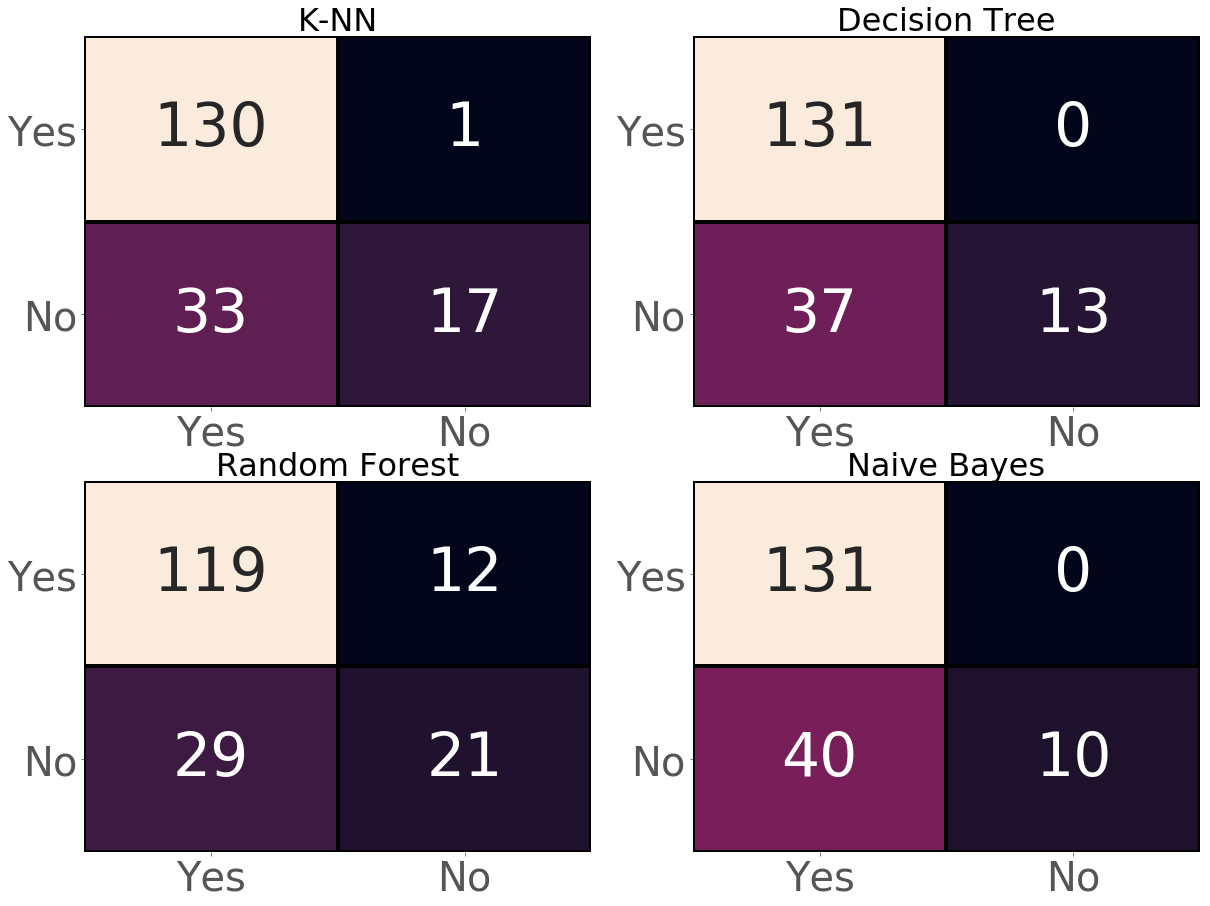

In [37]:
mat_dt = [[131,0],[37,13]]
mat_knn = [[130,1],[33,17]]
mat_rf = [[119,12],[29,21]]
mat_gnb = [[131,0],[40,10]]

mat_dt = pd.DataFrame(mat_dt)
mat_knn = pd.DataFrame(mat_knn)
mat_rf = pd.DataFrame(mat_rf)
mat_gnb = pd.DataFrame(mat_gnb)


f = plt.figure(figsize=(20,15))
f.add_subplot(221)
g = sns.heatmap(mat_knn, annot=True, fmt='g' , linewidths=3, linecolor='black', 
                annot_kws={"size": 60}, cbar=False)
plt.xticks(size=14)
g.set_yticklabels(['Yes', 'No'], rotation = 0, fontsize = 40)
g.set_xticklabels(['Yes', 'No'], rotation = 0, fontsize = 40)
plt.title("K-NN", size=32)

f.add_subplot(222)
g = sns.heatmap(mat_dt, annot=True, fmt='g' ,  linewidths=3, linecolor='black', 
                annot_kws={"size": 60}, cbar=False)
plt.xticks(size=14)
g.set_yticklabels(['Yes', 'No'], rotation = 0, fontsize = 40)
g.set_xticklabels(['Yes', 'No'], rotation = 0, fontsize = 40)
plt.title("Decision Tree", size=32)


f.add_subplot(223)
g = sns.heatmap(mat_rf, annot=True, fmt='g' ,  linewidths=3, linecolor='black', 
                annot_kws={"size": 60}, cbar=False)
plt.xticks(size=14)
g.set_yticklabels(['Yes', 'No'], rotation = 0, fontsize = 40)
g.set_xticklabels(['Yes', 'No'], rotation = 0, fontsize = 40)
plt.title("Random Forest", size=32)

f.add_subplot(224)
g = sns.heatmap(mat_gnb, annot=True, fmt='g' , linewidths=3, linecolor='black', 
                annot_kws={"size": 60}, cbar=False)
plt.xticks(size=14)
g.set_yticklabels(['Yes', 'No'], rotation = 0, fontsize = 40)
g.set_xticklabels(['Yes', 'No'], rotation = 0, fontsize = 40)
plt.title("Naive Bayes", size=32)

plt.savefig("Confusion_Matrix_KTH.png")

(array([203., 110.,  74.,  53.,  37.,  27.,  18.,  10.,   4.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

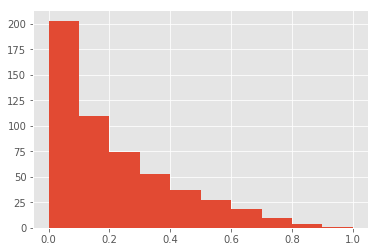

In [64]:
plt.hist(x_train['Age'])